# 编程和测试要求
## 5. 封闭测试

> 根据第4关的结果，进一步分析，对于你随机选择的一个明密文对，是不是有不止一个密钥Key？进一步扩展，对应明文空间任意给定的明文分组$P_{n}$，是否会出现选择不同的密钥$K_{i}\ne K_{j}$加密得到相同密文$C_n$的情况？

In [15]:
# 加载实现的加密算法类
from SDES.SDES import SDES
from SDES.brute_force_attack import brute_force_attack

### 5.1 已知明密文对破解密钥

#### 5.1.1 测试1
plaintext1 = 11111111
ciphertext1 = 11101000
key1 = 1010101010

In [16]:
ciphertext1 = "11101000"
expected_plaintext1 = "11111111"

found_keys = brute_force_attack(ciphertext1, expected_plaintext1)
if found_keys:
    print(f"Possible keys are: {', '.join(found_keys)}")
else:
    print("No keys found.")

Possible keys are: 0001000101, 0101000101, 1001110011, 1010101010, 1101110011, 1110101010


#### 5.1.2 测试2
plaintext2 = 11001100
ciphertext2 = 10010101
key2 = 1111000001

In [17]:
ciphertext2 = "10010101"
expected_plaintext2 = "11001100"

found_keys = brute_force_attack(ciphertext2, expected_plaintext2)
if found_keys:
    print(f"Possible keys are: {', '.join(found_keys)}")
else:
    print("No keys found.")

Possible keys are: 1001110011, 1010101010, 1101110011, 1110101010


#### 5.1.3 测试3
plaintext3 = 11111111
ciphertext3 = 01011111
key3 = 1111111000

In [18]:
ciphertext3 = "01011111"
expected_plaintext3 = "11111111"

found_keys = brute_force_attack(ciphertext3, expected_plaintext3)
if found_keys:
    print(f"Possible keys are: {', '.join(found_keys)}")
else:
    print("No keys found.")

Possible keys are: 0001001011, 0101001011, 1011111000, 1111111000


### 5.1.4 结果讨论

**1. 输入和输出空间大小:**

- **输入空间**: S-DES的密钥空间为 $2^{10}$（因为有10位密钥），而明文空间为 $2^8$（因为有8位明文）。因此，明文和密钥的组合总数为 $2^{10} \times 2^8 = 2^{18}$。

- **输出空间**: 密文空间为 $2^8$（因为有8位密文）。

**2. 函数映射:**

假设加密函数为$f(k, m)$，其中$k$是密钥，$m$是明文。如果有两个不同的密钥和明文组合 $(k_1, m_1)$ 和 $(k_2, m_2)$ ，它们映射到相同的密文，即:

$f(k_1, m_1) = f(k_2, m_2)$

这实际上表示了一个碰撞。

**3. 证明密钥碰撞的可能性:**

考虑鸽笼原理（Pigeonhole Principle）：如果有 $n$ 个鸽笼和 $m > n$ 只鸽子，至少有一个鸽笼内有多于一只鸽子。

在这里，鸽笼可以看作输出空间，而鸽子可以看作输入的组合（即明文和密钥的组合）。我们有 $2^8$ 个鸽笼（即密文的可能值）和 $2^{18}$ 只鸽子（即明文和密钥的所有可能组合）。显然， $2^{18} > 2^8$，因此根据鸽笼原理，必然存在多于一个输入组合映射到同一个输出值，即存在碰撞。

因此，从数学的角度证明了S-DES中可能发生密钥碰撞。

### 5.2 任意明文经过不同密钥加密得到相同密文

#### 5.2.1 定义暴力加密检测函数及可视化代码


In [19]:
import pandas as pd

def encryption_statistics(plaintext):
    '''统计明文在所有可能的SDES密钥下加密后的密文频率'''
    # 初始化一个空字典来保存密文及其出现的次数
    ciphertexts = {}

    for i in range(1024):  # 2^10 = 1024 个可能的密钥
        key = bin(i)[2:].zfill(10)  # 将数字转化为10位的二进制字符串表示
        sdes = SDES(key)
        encrypted_text = sdes.encrypt(plaintext)

        # 如果这个密文已经在字典中，则增加其计数，否则初始化为1
        if encrypted_text in ciphertexts:
            ciphertexts[encrypted_text] += 1
        else:
            ciphertexts[encrypted_text] = 1

    # 使用pandas构建一个DataFrame来展示统计数据
    df = pd.DataFrame(list(ciphertexts.items()), columns=["Ciphertext", "Count"])

    # 按Count列排序，以显示最常见的密文
    df = df.sort_values(by="Count", ascending=False)

    return df

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_statistics(df):
    '''使用seaborn绘制密文统计数据'''

    # 设置seaborn的样式
    sns.set_style("whitegrid")

    plt.rcParams["font.family"] = "SimHei"
    # 创建一个大图以便更清晰地显示所有密文
    plt.figure(figsize=(15, 10))

    # 绘制柱状图
    sns.barplot(x="Ciphertext", y="Count", data=df, palette="viridis")

    # 设置标题和标签
    plt.title("某一明文SDES加密下全部可能的密文统计图", fontsize=16)
    plt.xlabel("密文", fontsize=14)
    plt.ylabel("频次", fontsize=14)

    # 旋转X轴的标签，使其更易读
    plt.xticks(rotation=90, fontsize=10)

    # 显示图表
    plt.show()

#### 5.2.2 测试1

In [21]:
plaintext1 = "11111111"
df1 = encryption_statistics(plaintext1)
df1

,Ciphertext,Count
35,11111111,8
39,11111010,8
34,00110110,6
38,10111011,6
40,11000010,6
...,...,...
107,10101010,2
219,01000010,2
146,00100101,2
142,11101100,2


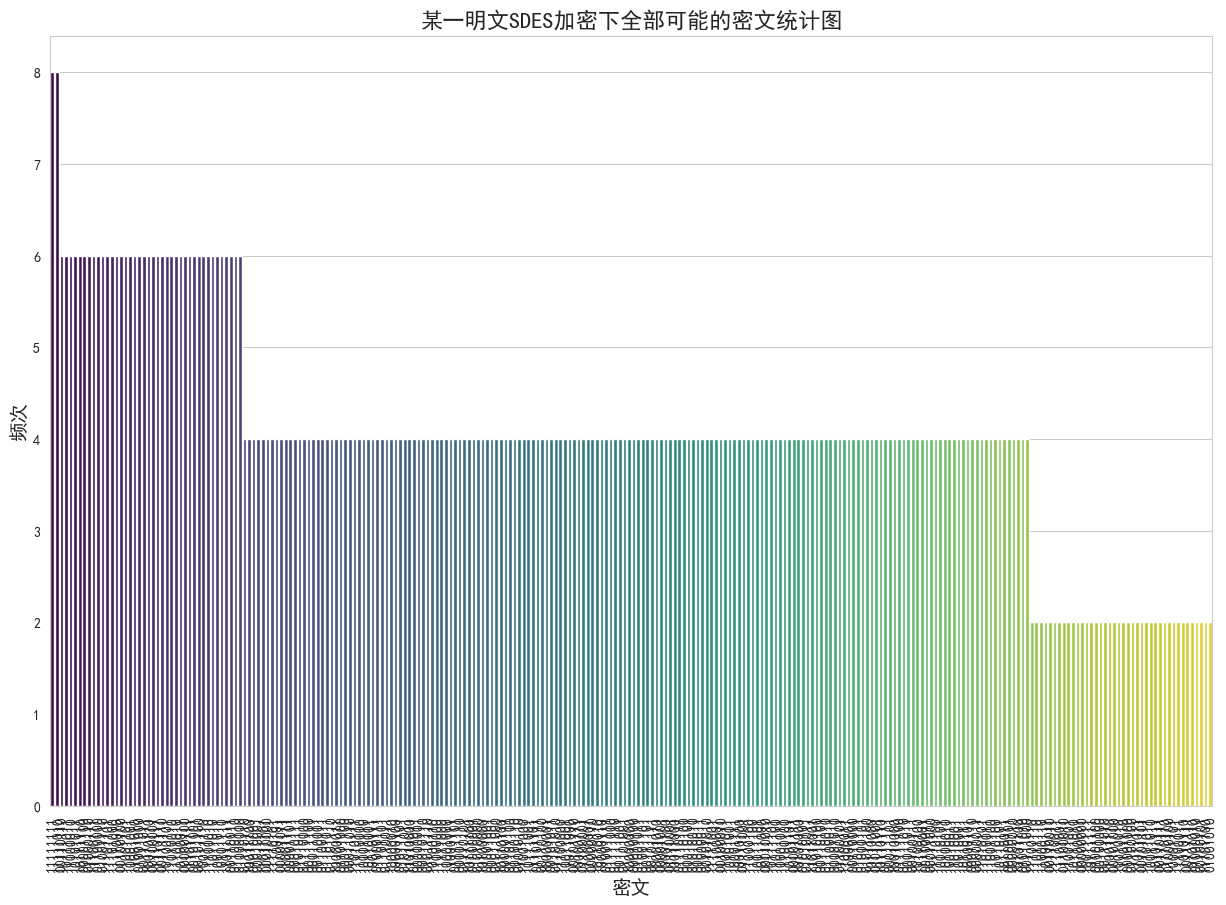

In [22]:
plot_statistics(df1)

测试1的结果可以看出，明文11111111在所有可能的SDES（1024种）密钥下加密后的密文仅有254种，且每种密文的出现次数都不相同。其中有两个密文出现了8次，最少也有出现两次的情况。

#### 5.2.3 测试2

In [23]:
plaintext2 = "11001100"
df2 = encryption_statistics(plaintext2)
df2

,Ciphertext,Count
102,00110010,8
83,00110111,8
62,11110011,6
153,00010010,6
104,00001101,6
...,...,...
182,00100100,2
193,01010010,2
203,00100001,2
207,01110010,2


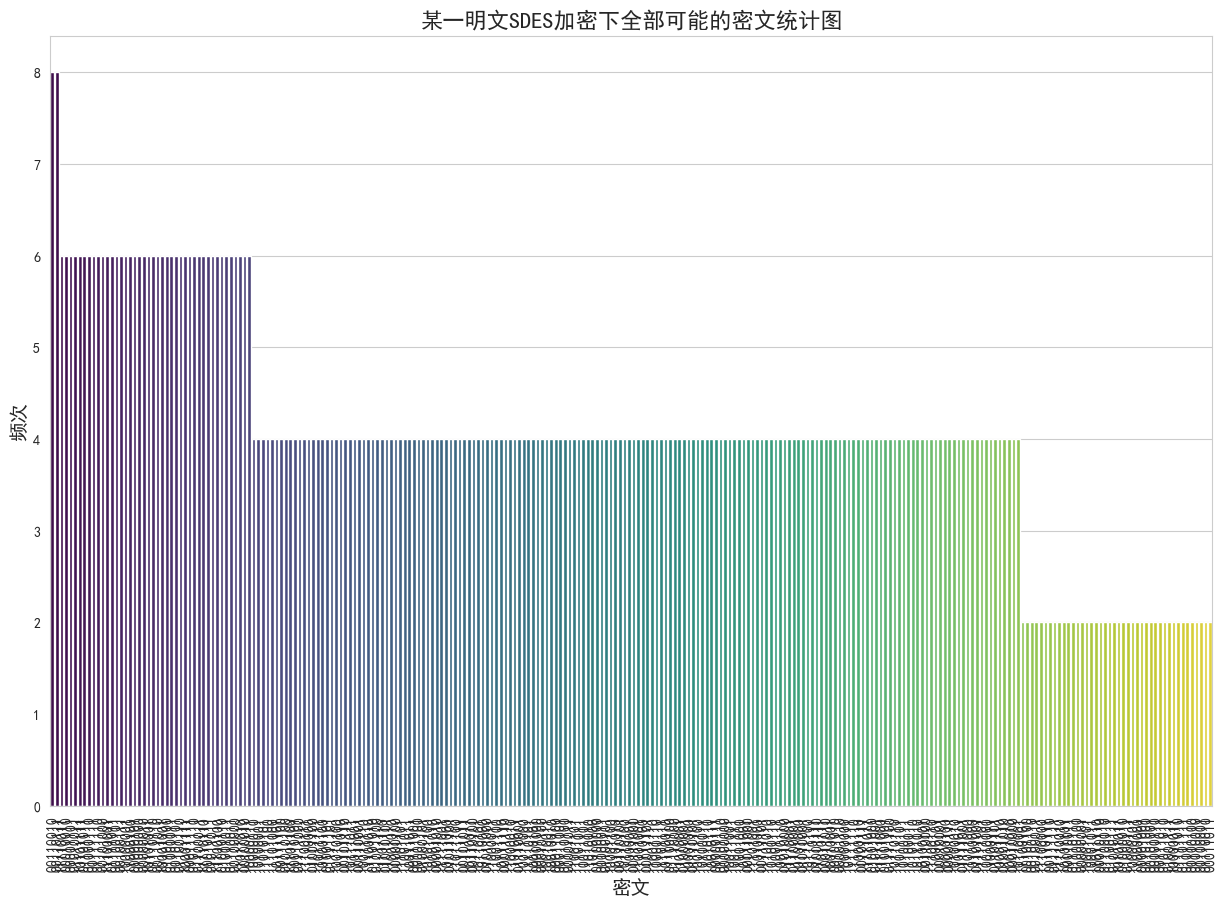

In [24]:
plot_statistics(df2)

可以看出和测试1统计结果几乎相同。

#### 5.2.4 结果讨论

原因1: S盒的非线性。如前所述，S盒是SDES中的非线性组件。当我们在所有可能的密钥上尝试相同的明文时，可能会遇到多个密钥导致S盒的相同输出。即使我们改变密钥，由于S盒的非线性特性，其输出可能仍然相同。

原因2: 重叠扩展置换。在SDES中，有一个扩展置换（EP）,它会将4位的输入扩展到8位。这个扩展不是简单地增加更多的信息，而是重复某些位。这意味着当这些位参与到与密钥的XOR操作中时，某些密钥位会影响到重叠的位。因此，不同的密钥可能会导致加密过程中的这些重叠位的相同结果。

原因3: 密钥调度。在SDES中，生成两个子密钥的过程涉及到置换和循环左移。这可能导致不同的10位密钥产生相同的8位子密钥。